<a href="https://colab.research.google.com/github/Donald-Mathew/Analytics/blob/main/dataanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")
titanic.head(6)  #check the first 6 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
categorical = titanic.dtypes[titanic.dtypes == "object"].index
print(categorical)

titanic[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#after looking at the data for the first time, you should
#ask yourself a few questions
#1.Do I need all of the variables? 2.Should I transform any variables
#Are there NA values, outliers or strange values?
#Should I create new variables

In [ ]:
del titanic["PassengerId"]   #removing PassangerID Column

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#"Survived" shows whether each passanger lived or died.Since predicting
#survival is our goal, we need to keep it
#Features that describe passangers numerically or group them into a few broad
#categories could be useful for predicting survival
#The variables Pclass, sex, Age, Sibsp, Parch, Fare and Embarked seem
#to be useful

In [ ]:
sorted(titanic["Name"])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [ ]:
titanic["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [ ]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [ ]:
titanic["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [ ]:
titanic["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
#sometime we may want to change the name of a variable
#For instance, Survived is just an integer variable that takes 0 or 1
#based on whether a passanger died ir survived respectively.Variables
#that indicate a state of sth with numbers is sometime called
#indicator or dummy variables (0 for absence and 1 for presence)
#We can encode survived as a categorical variable with more descriptive categories

new_survived = pd.Categorical(titanic["Survived"])
print(new_survived)

[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 891
Categories (2, int64): [0, 1]


In [ ]:
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived)

['Died', 'Survived', 'Survived', 'Survived', 'Died', ..., 'Died', 'Survived', 'Died', 'Survived', 'Died']
Length: 891
Categories (2, object): ['Died', 'Survived']


In [ ]:
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [ ]:
#there is one more variable that has a questionable data encoding: Pclass
#Pclass is an integer that highlights a passanger's class with 1 being firstclass
#2 being second class and 3 being 3rd class
#passanger class is a category so it does not make a lot of sense
#to encode it as a numeric variable.Thus we can transform P into
#an ordered categorical variable

new_Pclass = pd.Categorical(titanic["Pclass"], ordered = True)

new_Pclass = new_Pclass.rename_categories(["Class1", "Class2", "Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [ ]:
titanic["Pclass"] = new_Pclass



In [ ]:
titanic["Cabin"].unique()   #to check unique values

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
import numpy as np
char_cabin = titanic["Cabin"].astype(str) #converts data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) #Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [ ]:
titanic["Cabin"] = new_Cabin

In [ ]:
#Detecting missing values is the easy but it is far more difficult
#to decide how to handle them.In cases where you have a lot of data
# and only a few missing values, it may make sense to simply delete
#records with missing values present
#on the other hand, if you have many missing values, removing
#records with missing values could cause you to get rid of a lot of data
#missing values in categorical data is not particularly troubling since
#you can simply treat NA as an additional category.Missing values in
# numerical variables are more troublesome,since you cannot just treat a missing
#value as a number.
#it turns out that the titanic dataset has some NAs in the Age variable


titanic["Age"].describe()
#we realize that the count in the Age column is fewer than the total records
#perhaps 891 I believe



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#we can get the row indexes of the missing values with np.where()

missing = np.where(titanic["Age"].isnull()  == True)


(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888]),)


In [ ]:
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

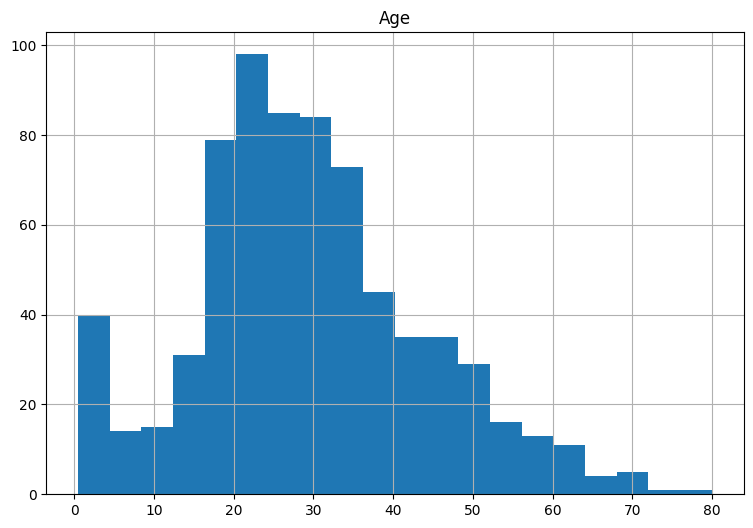

In [ ]:
#with 177 missing values it is probably not a good idea to throw all those
#records away.We could deal with them by:
#Replacing the null values with 0s
#Replace the null values with some central value like the mean or the median
#Impute some other value
#Split the data set into two parts: One set with where records have an Age value
#and another null

#setting missing values in numeric data to zero makes sense in some cases
#but it does not make sense here since a person's age cannot be zero.Setting
#all ages to some central number like the median is a simple fix but there
#is no telling whether such a central number is a reasonable estimate
#of age without lookng at the distribution of ages.For all we know each age
#is equally common.We can quickly get a sense of the distribution of ages
#by creating a histogram of the ages variable with df.hist():


titanic.hist(column = "Age", figsize=(9,6), bins = 20)

In [ ]:
#from the histogram,it is evident that ages between 20 and 30 are the most common
#so filling in missing values with a central number like the mean or the median
#would not be entirely unreasonable.So we can fill in missing values with the
#median age of 28

new_age_var = np.where(titanic["Age"].isnull(), #logical check
                       28,    #value if check is True
                       titanic["Age"]) #value if check is False

titanic["Age"] =  new_age_var
titanic["Age"].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

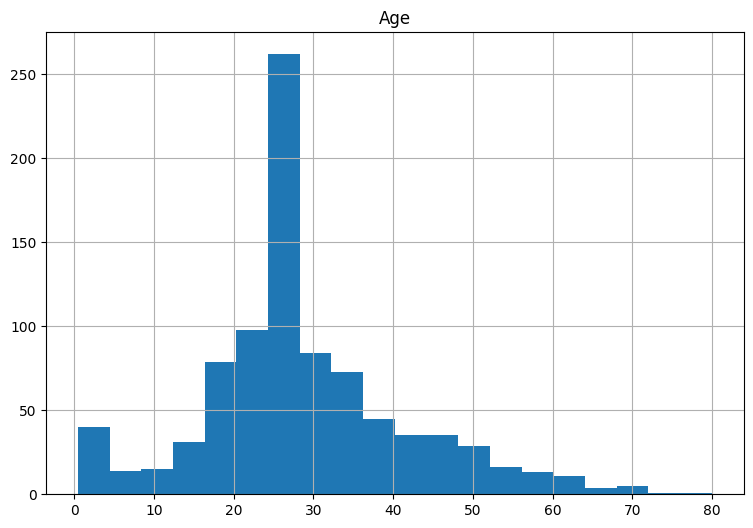

In [ ]:
titanic.hist(column = "Age",
             figsize = (9,6),
             bins = 20)

<Axes: >

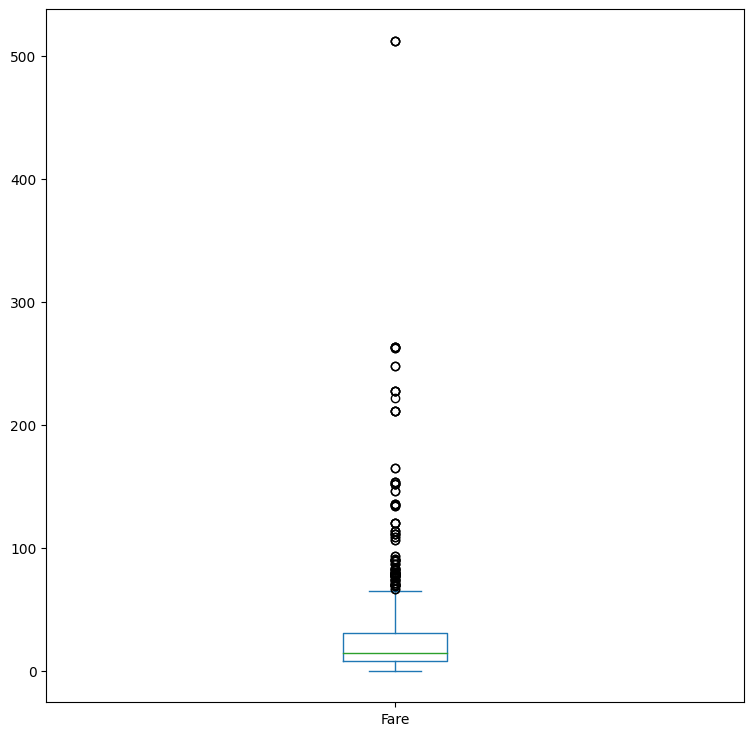

In [ ]:
#we can demonstrate outliers by producing a boxplot on the Fare variable

titanic["Fare"].plot(kind = "box",
                     figsize = (9,9))

In [ ]:
index = np.where(titanic["Fare"] == max(titanic["Fare"]))

titanic.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C
